# **Mileage Prediction Regression Analysis**

## **Objective**

The objective of this project is to analyze and predict the mileage of the vehicles by the regression techniques.

## **Data Source**

 This dataset was taken from the StatLib library which is
maintained at Carnegie Mellon University. The dataset was
used in the 1983 American Statistical Association Exposition.

This dataset is a slightly modified version of the dataset provided in
the StatLib library. In line with the use by Ross Quinlan (1993) in
predicting the attribute "mpg", 8 of the original instances were removed
because they had unknown values for the "mpg" attribute. The original
dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon,
to be predicted in terms of 3 multivalued discrete and 5 continuous
attributes." (Quinlan, 1993)


Attribute Information:

* mpg: continuous
* cylinders: multi-valued discrete
* displacement: continuous
* horsepower: continuous
* weight: continuous
* acceleration: continuous
* model year: multi-valued discrete
* origin: multi-valued discrete
* car name: string (unique for each instance)

## **Import Library**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

## **Import Data**

In [3]:
df = pd.read_csv("/content/auto_mpg.csv")

## **Describe Data**

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


## **Data Preprocessing**

In [9]:
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


## **Data Visualization**

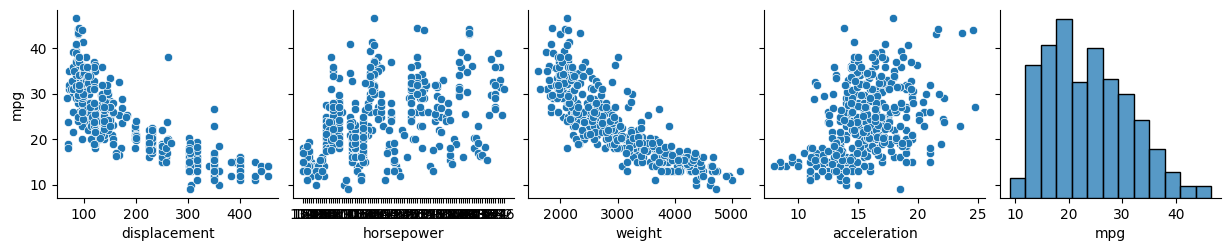

In [11]:
sns.pairplot(df,x_vars = ['displacement','horsepower','weight','acceleration','mpg'] , y_vars = ['mpg'])

<Axes: xlabel='acceleration', ylabel='mpg'>

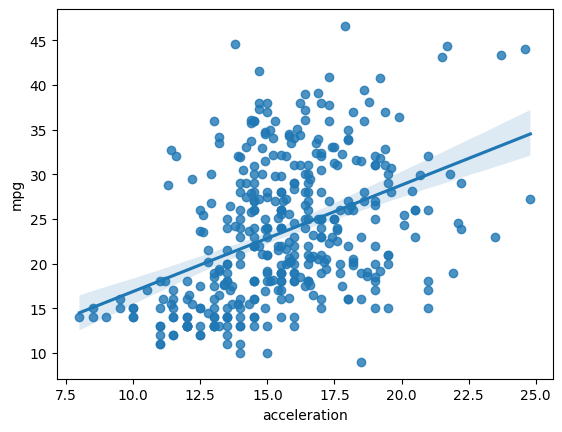

In [12]:
sns.regplot(x = 'acceleration', y = 'mpg', data = df)

## **Define Target Variable (Y) and Feature Variable (X)**

In [13]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [14]:
y = df.mpg

In [15]:
y.shape

(398,)

In [16]:
X = df[['displacement','horsepower','weight','acceleration']]

In [17]:
X.shape

(398, 4)

In [18]:
X

,displacement,horsepower,weight,acceleration
0,307.0,130,3504,12.0
1,350.0,165,3693,11.5
2,318.0,150,3436,11.0
3,304.0,150,3433,12.0
4,302.0,140,3449,10.5
...,...,...,...,...
393,140.0,86,2790,15.6
394,97.0,52,2130,24.6
395,135.0,84,2295,11.6
396,120.0,79,2625,18.6


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
st = StandardScaler()

In [21]:
X['horsepower'] = X['horsepower'].replace('?', 0.0)

# X['horsepower'] = X['horsepower'].astype(float)

<ipython-input-21-552d1cfce498>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['horsepower'] = X['horsepower'].replace('?', 0.0)


In [23]:
X = st.fit_transform(X)

In [24]:
X

array([[ 1.0906037 ,  0.67394962,  0.63086987, -1.29549834],
       [ 1.5035143 ,  1.54418676,  0.85433297, -1.47703779],
       [ 1.19623199,  1.17122799,  0.55047045, -1.65857724],
       ...,
       [-0.56103873, -0.46979062, -0.79858454, -1.4407299 ],
       [-0.70507731, -0.59411021, -0.40841088,  1.10082237],
       [-0.71467988, -0.51951845, -0.29608816,  1.39128549]])

In [26]:
pd.DataFrame(X).describe()

,0,1,2,3
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-1.785283e-17,-1.249698e-16,-1.606755e-16,-2.677925e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.204411e+00,-2.558360e+00,-1.604943e+00,-2.747814e+00
25%,-8.563178e-01,-6.935659e-01,-8.828266e-01,-6.328794e-01
50%,-4.314040e-01,-2.708793e-01,-1.973624e-01,-2.472221e-02
75%,6.584879e-01,5.496300e-01,7.538337e-01,5.834349e-01
max,2.511784e+00,3.160341e+00,2.565185e+00,3.351912e+00


## **Train Test Split**

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 2529)

In [43]:
X_test

array([[ 1.19623199,  1.17122799,  1.14637205, -0.85980367],
       [-1.04116734, -0.94220506, -1.12372926,  1.31866971],
       [ 0.30319277, -0.19628752,  0.96310866,  1.24605393],
       [ 0.06312847, -0.4449267 , -0.00641377,  0.08420146],
       [-0.98355191, -1.24057208, -1.38975675,  0.70143559],
       [-0.92593647, -0.37033494, -1.0291417 ,  0.33835669],
       [ 0.37041078, -0.07196792, -0.39776978, -0.93241945],
       [ 1.98364292,  1.91714553,  1.47742849, -1.62226935],
       [ 1.98364292,  1.5939146 ,  2.28851676, -1.1139589 ],
       [-0.68587217, -0.42006278, -0.88016631,  0.33835669],
       [-0.8491159 , -0.7184298 , -1.17102304, -0.09733799],
       [ 0.30319277,  0.17667126,  0.46061228,  0.37466458],
       [-1.03156477, -0.96706898, -1.2951692 ,  0.3020488 ],
       [ 1.5035143 ,  1.0469084 ,  1.31426495, -0.93241945],
       [ 0.36080821,  0.17667126,  0.52564122,  0.08420146],
       [ 1.19623199,  0.9225888 ,  1.31190027, -0.67826422],
       [ 0.04392332, -0.

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((278, 4), (120, 4), (278,), (120,))

## **Linear Regression Model**

In [30]:
from sklearn.linear_model import LinearRegression

In [44]:
lr = LinearRegression().fit(X_train,y_train)

In [45]:
lr

LinearRegression()

In [46]:
lr.intercept_

23.513201774628328

In [48]:
lr.coef_

array([-1.21515035, -1.07770429, -4.57924481, -0.15549873])

## **Prediction**

In [47]:
y_pred = lr.predict(X_test)

In [49]:
y_pred

array([15.68154278, 30.73457497, 18.75224674, 23.93226762, 32.30029912,
       29.69754312, 25.10713236, 12.52341554,  9.07854949, 28.77722598,
       30.69679721, 20.78686136, 31.69285108, 14.68459725, 20.46423314,
       15.16327889, 24.41926302, 31.93596875, 14.60882759, 11.51722812,
       18.53453033, 30.24729295, 27.10273579, 18.77417667, 20.25538173,
       25.96756041, 32.03191466, 30.30902018,  9.62801044, 25.49111572,
        8.33612436, 26.80606355, 30.93232304, 20.87515111, 16.87768394,
       20.88826446, 10.10536609, 23.59245213, 30.94522122, 33.34906163,
       26.11894115, 31.14216349, 27.60998057, 18.68781194, 22.0193621 ,
       27.31957975, 20.55521993, 29.63841797, 23.42176895, 24.52746607,
       27.72012262, 12.68983939, 22.73168868, 32.49795335, 18.97467075,
       14.06147355, 30.94469839, 26.68702922, 20.99305236, 29.90614276,
       23.31295946, 30.83233374, 22.87035414,  8.71972812, 31.34280921,
       19.64015966, 27.63865974, 21.27575101, 11.3137363 , 28.58

In [50]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [51]:
mean_absolute_error(y_test,y_pred)

3.545102063573775

In [52]:
mean_absolute_percentage_error(y_test,y_pred)

0.1579278071727668

In [53]:
r2_score(y_test,y_pred)

0.6644805746934244

## **Polynomial Regression**

In [54]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
pol = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)

In [58]:
X_train2 = pol.fit_transform(X_train)

In [60]:
X_test2 = pol.fit_transform(X_test)

In [61]:
lr.fit(X_train2,y_train)

LinearRegression()

In [62]:
lr.intercept_

21.738752136518244

In [63]:
lr.coef_

array([-2.54877098, -2.2148693 , -3.45152397,  0.03825853,  1.27380787,
        0.55419384, -1.78407401,  0.65532813,  1.1466781 ,  1.43576099])

In [64]:
y_pred_pol = lr.predict(X_test2)

In [65]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [67]:
mean_absolute_error(y_test,y_pred_pol)

3.1971372205355517

In [68]:
mean_absolute_percentage_error(y_test,y_pred_pol)

0.1389504232876793

In [69]:
r2_score(y_test,y_pred_pol)

0.6681817692952996

## **Explanation**

Linear regression and polynomial regression are both techniques used in machine learning and statistics to model the relationship between a dependent variable (often denoted as "y") and one or more independent variables (often denoted as "x"). They are used for regression analysis, which is a type of supervised learning aimed at predicting a continuous output based on input features.

**Linear Regression:**

* **Objective:** Linear regression aims to find a linear relationship between the independent variable(s) and the dependent variable. In simple linear regression, there is only one independent variable, while in multiple linear regression, there are multiple independent variables.

* Model: The linear regression model can be represented as:
  y = b0 + b1*x1 + b2*x2 + ... + bn*xn

    * where:
        * y is the dependent variable.
        * x1, x2, ..., xn are the independent variables.
        * b0, b1, b2, ..., bn are the coefficients or weights associated with each independent variable.


**Polynomial Regression:**

* **Objective:** Polynomial regression extends linear regression to capture more complex relationships between the independent and dependent variables by allowing for nonlinear relationships. It introduces polynomial terms to the model.

* **Model:** In polynomial regression, the model is expressed as: y = b0 + b1*x + b2*x^2 + ... + bn*x^n
  * where:
      * y is the dependent variable.
      * x1, x2, ..., xn are the independent variables.
      * b0, b1, b2, ..., bn are the coefficients or weights associated with each independent variable.